Matplotlib created a temporary config/cache directory at /tmp/matplotlib-1sa2so2_ because the default path (/home/mininet/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


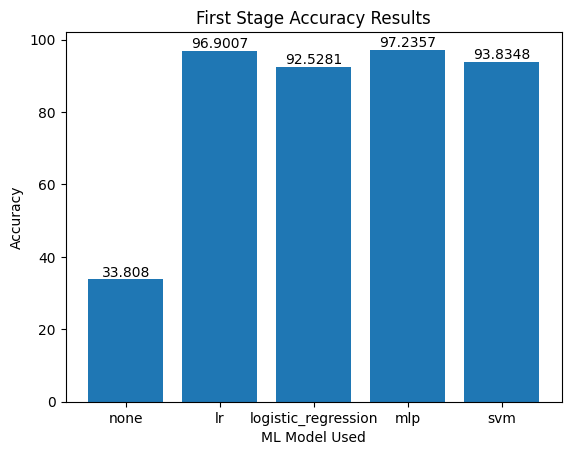

none


,cpu,network,memory
cpu,726,767,527
network,671,711,538
memory,699,749,581


lr


,cpu,network,memory
cpu,2058,0,0
network,38,2227,147
memory,0,0,1499


logistic_regression


,cpu,network,memory
cpu,1934,0,0
network,0,1943,0
memory,162,284,1646


mlp


,cpu,network,memory
cpu,2055,5,0
network,1,2106,3
memory,40,116,1643


svm


,cpu,network,memory
cpu,2096,100,0
network,0,1859,0
memory,0,268,1646


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import pandas as pd

# STAGE 1 ACCURACY
first_root_dir = "/home/mininet/network_topo/experiments/first/"
# Load in all summary files
results = {}
models = ["none", "lr", "logistic_regression", "mlp", "svm"]
for model in models:
    dir_name = f"exp_1s_{model}_2s_none_ct_False_nwp_False/"
    with open(os.path.join(first_root_dir, dir_name, "summary.json")) as f:
        results[model] = json.load(f)
y = np.array([results[model]["accuracy"] for model in models])
fig, ax = plt.subplots()
bars = ax.bar(models, y)
ax.bar_label(bars)
ax.set_xlabel('ML Model Used')
ax.set_ylabel("Accuracy")
ax.set_title('First Stage Accuracy Results')

plt.show()
for model in models:
    df = pd.DataFrame(results[model]["confusion_matrix"])
    print(model)
    display(df)

# Timing Results

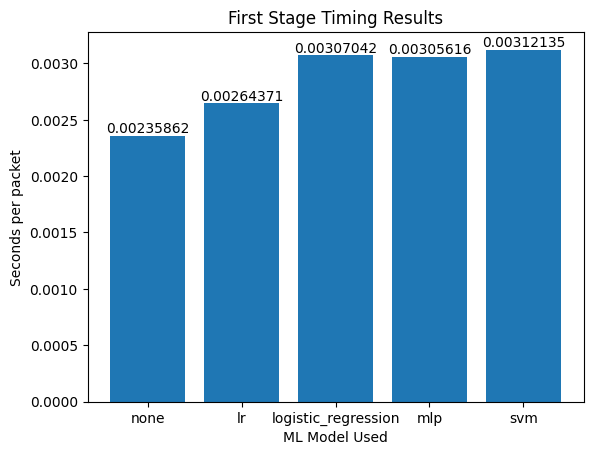

In [2]:
y = np.array([results[model]["seconds_per_packet"] for model in models])
fig, ax = plt.subplots()
bars = ax.bar(models, y)
ax.bar_label(bars)
ax.set_xlabel("ML Model Used")
ax.set_ylabel("Seconds per packet")
ax.set_title("First Stage Timing Results")
plt.show()

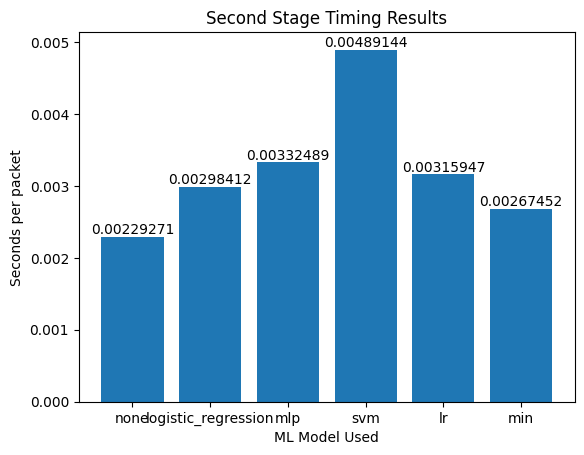

In [3]:
plt.rcParams['figure.figsize'] = [6.4,4.8]
# STAGE 2 (All cross traffic)
second_root_dir = "/home/mininet/network_topo/experiments/second/"
# Load in all summary files
results = {}
models = ["none", "logistic_regression", "mlp", "svm", "lr", "min"]
for model in models:
    dir_name = f"exp_1s_none_2s_{model}_ct_False_nwp_False_ping_False"
    with open(os.path.join(second_root_dir, dir_name, "summary.json")) as f:
        results[model] = json.load(f)
y = np.array([results[model]["seconds_per_packet"] for model in models])
fig, ax = plt.subplots()
bars = ax.bar(models, y)
ax.bar_label(bars)
ax.set_xlabel("ML Model Used")
ax.set_ylabel("Seconds per packet")
ax.set_title("Second Stage Timing Results")
plt.show()


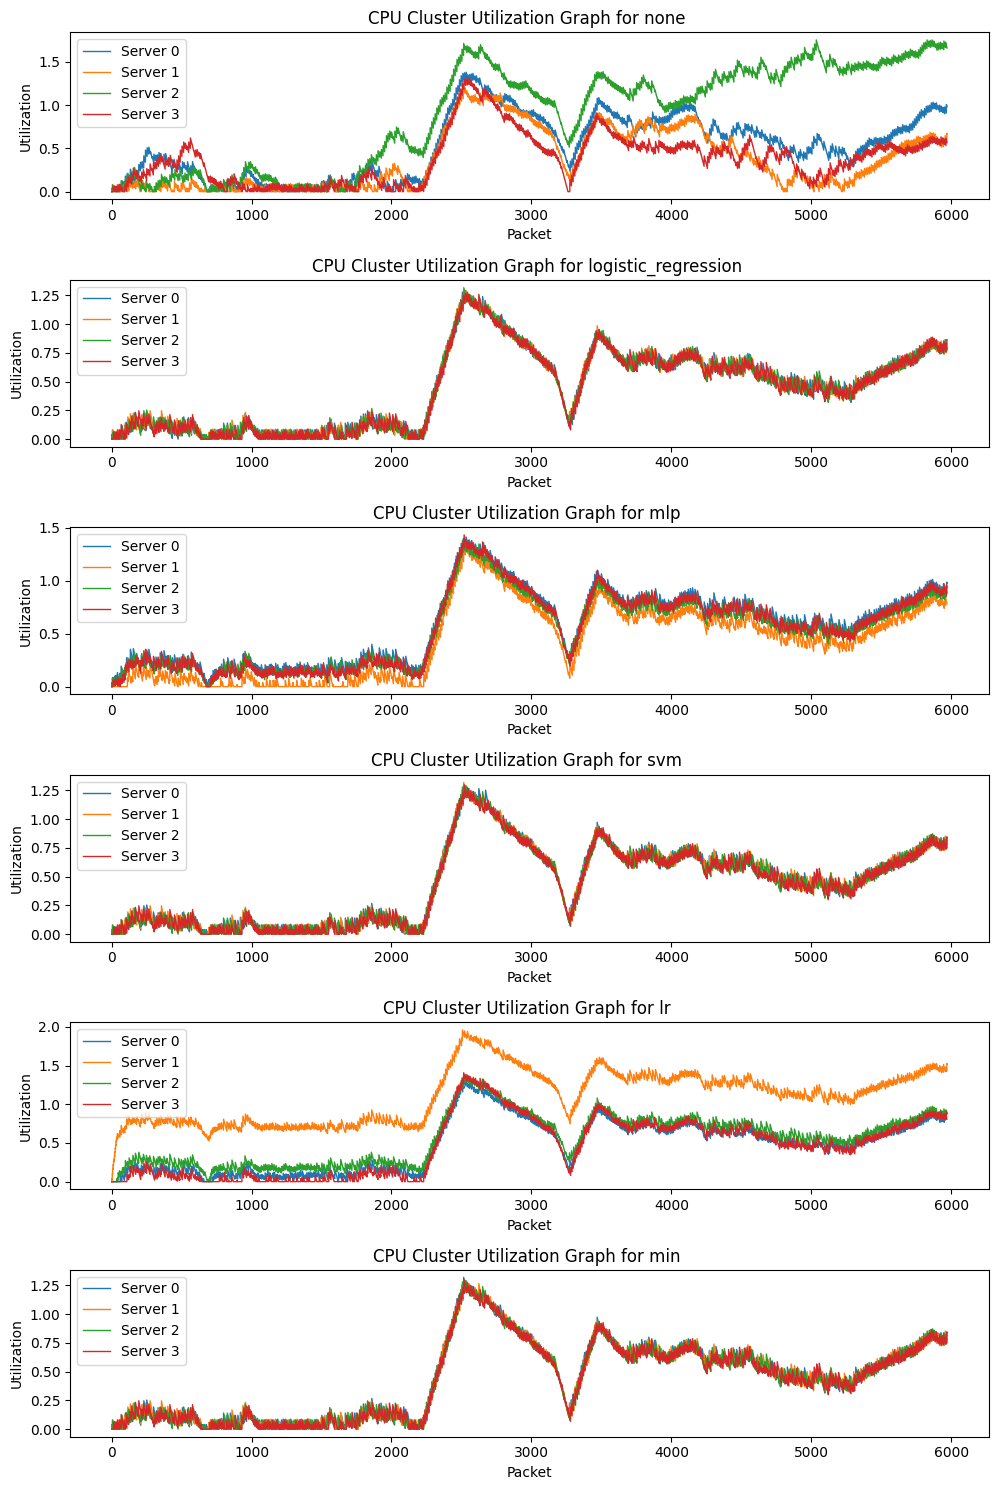

In [4]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, axs = plt.subplots(len(models), 1)
for i, model in enumerate(models):
    dir_name = f"exp_1s_none_2s_{model}_ct_False_nwp_False_ping_False/"
    with open(os.path.join(second_root_dir, dir_name, "experiment.csv")) as f:
        lines = [line.split(',') for line in f.readlines()]
        x = np.arange(1,len(lines)+1)
        server_0 = np.array([float(row[23]) for row in lines])
        server_1 = np.array([float(row[24]) for row in lines])
        server_2 = np.array([float(row[25]) for row in lines])
        server_3 = np.array([float(row[26]) for row in lines])
        axs[i].plot(x, server_0, linewidth=1, label='Server 0')
        axs[i].plot(x, server_1, linewidth=1, label='Server 1')
        axs[i].plot(x, server_2, linewidth=1, label='Server 2')
        axs[i].plot(x, server_3, linewidth=1, label='Server 3')
        axs[i].set_xlabel("Packet")
        axs[i].set_ylabel("Utilization")
        axs[i].set_title(f"CPU Cluster Utilization Graph for {model} ")
        axs[i].legend()
plt.tight_layout()
plt.show()

In [5]:
# Second stage average utilization table
for model in models:
    dir_name = f"exp_1s_none_2s_{model}_ct_False_nwp_False_ping_False"
    with open(os.path.join(second_root_dir, dir_name, "summary.json")) as f:
        results[model] = json.load(f)
{model: results[model]["avg_utilization"] for model in models}

{'none': 0.47901395868229824,
 'logistic_regression': 0.369532104969292,
 'mlp': 0.45100502512562923,
 'svm': 0.3690295924064759,
 'lr': 0.5895153545505236,
 'min': 0.3689447236180895}